<a href="https://colab.research.google.com/github/afroman32/covid-vaers-analysis/blob/main/Data%20Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data

In [1]:
import pandas as pd

In [ ]:
files = ['2020VAERSDATA_utf8.csv', '2020VAERSSYMPTOMS.csv', '2020VAERSVAX.csv', 
         '2021VAERSDATA_utf8.csv', '2021VAERSSYMPTOMS.csv', '2021VAERSVAX_utf8.csv']

In [ ]:
# import 2020 data
vd2020 = pd.read_csv(files[0])
vs2020 = pd.read_csv(files[1])
vv2020 = pd.read_csv(files[2])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,12,15,23,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# import 2021 data
vd2021 = pd.read_csv(files[3])
vs2021 = pd.read_csv(files[4])
vv2021 = pd.read_csv(files[5])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,12,15,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# df1 = vaers vax, df2 = vaers symptoms, df3 = vaers data

def CovidVax(df1, df2, df3):
  """
  This method takes the three vaers dataframes and merges them into a single
  dataframe with only information about the covid vaccine
  This new dataframe is then returned
  """
  covid_vax = df1[df1['VAX_TYPE']=='COVID19']
  covid_vax_sympt = pd.merge(covid_vax, df2, on = 'VAERS_ID')
  all_covid = pd.merge(covid_vax_sympt, df3, on = 'VAERS_ID')

  return all_covid

In [ ]:
# covid vaccine data for 2020
ac2020 = CovidVax(vv2020, vs2020, vd2020)
ac2020.shape

(14104, 52)

In [ ]:
# covid vaccine data for 2021
ac2021 = CovidVax(vv2021, vs2021, vd2021)
ac2021.shape

(733318, 52)

In [ ]:
# column names for 2020 
ac2020.columns

Index(['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5',
       'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE',
       'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL',
       'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE',
       'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL',
       'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES'],
      dtype='object')

In [ ]:
# Check values in DIED column
ac2020['DIED'].value_counts()

Y    17
Name: DIED, dtype: int64

In [ ]:
# view people who died in 2020 after having received the COVID 19 vaccine
ac2020[ac2020['DIED']=='Y']

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
5615,909095,COVID19,MODERNA,011J20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),Foaming at mouth,23.1,Pain in extremity,23.1,Pallor,23.1,Pulse absent,23.1,Respiratory arrest,23.1,12/25/2020,CO,66.0,66.0,NaN,M,NaN,on 12/24/2020 the resident was sleepy and stay...,Y,12/25/2020,NaN,NaN,NaN,NaN,NaN,NaN,N,12/23/2020,12/25/2020,2.0,None,SEN,NaN,"Tamsulosin 0.4mg, Lactobacillus tablet, Nephro...",End stage renal disease with dependence on ren...,Refused dialysis frequently resulting in episo...,NaN,NaN,2,12/25/2020,NaN,NaN,NaN,"alprazolam, Lorazepam"
5616,909095,COVID19,MODERNA,011J20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),Somnolence,23.1,Unresponsive to stimuli,23.1,NaN,NaN,NaN,NaN,NaN,NaN,12/25/2020,CO,66.0,66.0,NaN,M,NaN,on 12/24/2020 the resident was sleepy and stay...,Y,12/25/2020,NaN,NaN,NaN,NaN,NaN,NaN,N,12/23/2020,12/25/2020,2.0,None,SEN,NaN,"Tamsulosin 0.4mg, Lactobacillus tablet, Nephro...",End stage renal disease with dependence on ren...,Refused dialysis frequently resulting in episo...,NaN,NaN,2,12/25/2020,NaN,NaN,NaN,"alprazolam, Lorazepam"
7042,910363,COVID19,MODERNA,LOT 039K20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),Death,23.1,Hypophagia,23.1,Hypotension,23.1,Somnolence,23.1,NaN,NaN,12/28/2020,CA,84.0,84.0,NaN,M,NaN,"Patient had mild hypotension, decreased oral i...",Y,12/28/2020,NaN,NaN,NaN,NaN,NaN,NaN,N,12/23/2020,12/26/2020,3.0,none,SEN,NaN,risperidone daily doxazosin,dementia declining oral intake,history of aspiration pneumonia BPH,NaN,NaN,2,12/28/2020,NaN,NaN,NaN,none
10073,913143,COVID19,PFIZER\BIONTECH,EL0140,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/29/2020,TX,84.0,84.0,NaN,F,NaN,Vaccine administered with no immediate adverse...,Y,12/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,N,12/29/2020,12/29/2020,0.0,NaN,SEN,NaN,"Gabapentin 100mg, Memantine 10mg",NaN,"dementia, aphasia, type 2 DM, iron deficiency,...",NaN,NaN,2,12/29/2020,NaN,NaN,NaN,"codeine, phenobarbital, penicillin"
10720,913733,COVID19,MODERNA,NaN,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Death,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/30/2020,PA,85.0,85.0,NaN,F,NaN,My grandmother died a few hours after receivin...,Y,12/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,N,12/29/2020,12/29/2020,0.0,NaN,SEN,NaN,NaN,NaN,NaN,NaN,NaN,2,12/30/2020,NaN,NaN,NaN,NaN
11728,914604,COVID19,PFIZER\BIONTECH,EH9899,1,IM,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/30/2020,MI,74.0,74.0,NaN,M,NaN,Spouse awoke 12/20 and found spouse dead. Clie...,Y,12/20/2020,NaN,NaN,NaN,NaN,NaN,NaN,N,12/16/2020,12/20/2020,4.0,NaN,OTH,NaN,NaN,NaN,NaN,NaN,NaN,2,12/21/2020,NaN,NaN,NaN,NaN
11749,914621,COVID19,MODERNA,011J02A,1,IM,RA,COVID19 (COVID19 (MODERNA)),Death,23.1,Dementia,23.1,Fatigue,23.1,NaN,NaN,NaN,NaN,12/30/2020,IA,89.0,89.0,NaN,F,NaN,Resident in our long term care facility who re...,Y,12/27/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/22/2020,12/27/2020,5.0,NaN,SEN,NaN,NaN,None,Resident in long term care facility for 9+ yea...,NaN,NaN,2,12/30/2020,NaN,NaN,NaN,NaN
11826,914690,COVID19,PFIZER\BIONTECH,NaN,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Anxiety,23.1,Death,23.1,Pyrexia,23.1,Respiratory distress,23.1,SARS-CoV-2 test negative,23.1,12/30/2020,CA,83.0,83.0,NaN,F,NaN,"Within 24 hours of receiving the vaccine, feve...",Y,12/26/2020,NaN,NaN,NaN,NaN,NaN,NaN,N,12/23/2020,12/24/2020,1.0,We were told her last COVID test was negative,SEN,NaN,Contact facility for medical records. We think...,none known,COPD,NaN,NaN,2,12/30/2020,NaN,NaN,NaN,non

In [ ]:
# Check values in DIED column
ac2021['DIED'].value_counts()

Y    11415
Name: DIED, dtype: int64

In [ ]:
# create a subset of data for deaths in 2021
dead = ac2021[ac2021['DIED']=='Y']
dead[['AGE_YRS', 'VAX_MANU']]

,AGE_YRS,VAX_MANU
657,82.0,MODERNA
1491,90.0,MODERNA
1494,78.0,MODERNA
1865,64.0,MODERNA
2138,65.0,PFIZER\BIONTECH
...,...,...
733309,NaN,JANSSEN
733312,36.0,PFIZER\BIONTECH
733313,36.0,PFIZER\BIONTECH
733314,36.0,PFIZER\BIONTECH


In [ ]:
dead['VAX_MANU'].value_counts()

PFIZER\BIONTECH         5459
MODERNA                 4873
JANSSEN                 1039
UNKNOWN MANUFACTURER      44
Name: VAX_MANU, dtype: int64

In [ ]:
dead['AGE_YRS'].value_counts()

73.00     381
77.00     380
84.00     318
83.00     317
82.00     313
         ... 
0.42        2
1.00        1
1.08        1
105.00      1
106.00      1
Name: AGE_YRS, Length: 96, dtype: int64

In [ ]:
cols = ['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5',
       'RECVDATE', 'STATE', 'AGE_YRS', 'SEX',
       'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL',
       'HOSPDAYS', 'X_STAY', 'DISABLE', 'VAX_DATE', 'ONSET_DATE',
       'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL',
       'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES']

In [ ]:
dead['ALLERGIES'].value_counts()

None                                              699
NKDA                                              468
NKA                                               393
none                                              391
Unknown                                           356
                                                 ... 
warfarin, sudafed                                   1
Wellbutrin, Niaspan                                 1
Avelox, influenza vaccine, sulfa, tetracycline      1
Didnt like sulfa or codeine                         1
Aloe, Tetracycline                                  1
Name: ALLERGIES, Length: 1272, dtype: int64

In [ ]:
dead[cols]

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,RECVDATE,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
657,917117,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),COVID-19,23.1,Death,23.1,SARS-CoV-2 test positive,23.1,NaN,NaN,NaN,NaN,1/1/2021,AR,82.0,M,"After vaccination, patient tested positive for...",Y,1/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,12/22/2020,12/28/2020,6.0,COVID-19 positive test approximately one week ...,SEN,NaN,"Quietapine, Mertazipine, Hydrocodone, Fentanyl",Yes,Yes,NaN,NaN,NaN,NaN,NaN,None
1491,917790,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),COVID-19,23.1,Death,23.1,Exposure to SARS-CoV-2,23.1,SARS-CoV-2 test positive,23.1,NaN,NaN,1/3/2021,AR,90.0,F,"At the time of vaccination, there was an outbr...",Y,1/3/2021,NaN,NaN,NaN,NaN,NaN,NaN,12/22/2020,12/29/2020,7.0,Unknown,SEN,NaN,"Torsemide, Trazadone, Amitizide, Morphine Sulf...",Patient was a resident of a long term care fac...,"Thyroid disease, chronic elderly conditions.",NaN,NaN,NaN,NaN,NaN,None
1494,917793,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),COVID-19,23.1,Death,23.1,SARS-CoV-2 test positive,23.1,NaN,NaN,NaN,NaN,1/3/2021,AR,78.0,F,Prior to the administration of the COVID 19 va...,Y,1/2/2021,NaN,NaN,NaN,NaN,NaN,NaN,12/22/2020,12/29/2020,7.0,Unknown,SEN,NaN,"Metoprolol-Tartrate, Latanoprost, Glipizide, P...","Diabetes, Thyroid disease","Diabetes, Thyroid Disease",NaN,NaN,NaN,NaN,NaN,None
1865,918065,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),Death,23.1,Unresponsive to stimuli,23.1,NaN,NaN,NaN,NaN,NaN,NaN,1/4/2021,CA,64.0,M,1/1/2020: Residents was found unresponsive. Pr...,Y,1/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,12/30/2020,1/1/2021,2.0,NaN,OTH,NaN,- Invega Trenza 546mg Q3months - Lithium 300m...,#NAME?,"- SCHIZOPHRENIA, UNSPECIFIED - ANEMIA, UNS...",NaN,NaN,NaN,NaN,NaN,#NAME?
2138,918388,COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,23.1,Pulse absent,23.1,Respiratory arrest,23.1,Resuscitation,23.1,Unresponsive to stimuli,23.1,1/4/2021,FL,65.0,F,"Resident found unresponsive without pulse, res...",Y,1/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,12/30/2020,1/1/2021,2.0,NaN,SEN,NaN,Albuteral Sulfate Amlodipine Carvedilol Ipratr...,No acute illness at time of vaccination. Hist...,As noted above,NaN,NaN,NaN,NaN,NaN,NKA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733309,1669586,COVID19,JANSSEN,UNK,NaN,COVID19 (COVID19 (JANSSEN)),Cerebrovascular accident,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9/3/2021,NaN,NaN,F,TWO STROKES; This spontaneous report received ...,Y,8/19/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTH,NaN,NaN,NaN,Comments: Unknown,NaN,USJNJFOC20210900460,NaN,NaN,NaN,NaN
733312,1669875,COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),Acute myeloid leukaemia,24.0,Biopsy bone marrow abnormal,24.0,Blast cells,24.0,Bone marrow failure,24.0,Caesarean section,24.0,9/3/2021,MN,36.0,F,Pregnancy history: G2P1001. Patient had the Pf...,Y,9/2/2021,Y,NaN,Y,19.0,NaN,Y,8/6/2021,8/15/2021,9.0,"CBC w/ diff (8/15/21): WBC 11.4, ANC 1.7, Plat...",PVT,NaN,"Acetaminophen PRN, aspirin 81 mg daily, docusa...",NaN,"major depression, generalized anxiety, gestati...",NaN,NaN,NaN,NaN,NaN,NKA
733313,1669875,COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),Chemotherapy,24.0,Death,24.0,Exposure during pregnancy,24.0,Full blood count,24.0,Haemorrhage intracranial,24.0,9/3/2021,MN,36.0,F,Pregnancy history: G2P1001. Patient had the Pf...,Y,9/2/2021,Y,NaN,Y,19.0,NaN,Y,8/6/2021,8/15/2021,9.0,"CBC w/ diff (8/15/21): WBC 11.4, ANC 1.7, Plat...",PVT,NaN,"Acetaminophen PRN,

In [ ]:
len(dead[dead['OTHER_MEDS'].isna()==True])

4488

In [ ]:
counts = dead['AGE_YRS'].value_counts()
u65 = dead[dead['AGE_YRS']<=30]
u65 = u65[u65['AGE_YRS']>=16]
u65['AGE_YRS'].value_counts().sum()

192

In [ ]:
O100 = dead[dead['AGE_YRS']>=100]
O100['AGE_YRS'].value_counts().sum()

71

In [ ]:
len(ac2020[ac2020['DIED'].isna()==False])

17

In [ ]:
len(ac2021[ac2021['DIED']=='Y'])/len(ac2021)

0.015566234566722759

In [69]:
df = pd.read_csv('2021_COVID_VAERS.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,30,33,41,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
print(df.shape)
df.head(2)

(733318, 53)


,Unnamed: 0,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,1/1/2021,NaN,Y,NaN,Pcn and bee venom
1,1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,1/1/2021,NaN,Y,NaN,Dairy


In [71]:
names = df.columns
names

Index(['Unnamed: 0', 'VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT',
       'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1',
       'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3',
       'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5',
       'SYMPTOMVERSION5', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO',
       'SEX', 'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY',
       'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [86]:
# define unwanted columns
toRemove = ['Unnamed: 0', 'VAX_LOT', 'VAX_SITE', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 
            'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5',
            'CAGE_YR', 'CAGE_MO', 'LAB_DATA', 'V_FUNDBY', 'FORM_VERS', 'RPT_DATE']

# exempt from null value disqualification
save = ['DIED', 'DATEDIED', 'L_THREAT', 'DISABLE', 'OTHER_MEDS', 'CUR_ILL',
        'BIRTH_DEFECT', 'ALLERGIES', 'OFC_VISIT', 'ER_ED_VISIT']

# check all columns for null values
for i in names:
  nullValues = df[i].isna().sum()

  # if number of null values is greater than 20 percent and the column is not in
  # save or already set to be removed add it
  if i not in toRemove and nullValues>= 146664 and i not in save:
    toRemove.append(i)

print(f'number of columns removed: {len(toRemove)}')

# remove the columns
df.drop(columns = toRemove, inplace = True)

14
number of columns removed: 26


In [92]:
print(df.shape)
df.head(5)

(733318, 27)


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_NAME,SYMPTOM1,RECVDATE,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,OTHER_MEDS,CUR_ILL,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),Dysphagia,1/1/2021,TX,33.0,F,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,PVT,None,None,1/1/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),Anxiety,1/1/2021,CA,73.0,F,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,SEN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,1/1/2021,NaN,Y,NaN,Dairy
2,916602,COVID19,PFIZER\BIONTECH,1,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,1/1/2021,WA,23.0,F,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,SEN,None,None,1/1/2021,NaN,NaN,Y,Shellfish
3,916603,COVID19,MODERNA,UNK,COVID19 (COVID19 (MODERNA)),Dizziness,1/1/2021,WA,58.0,F,"extreme fatigue, dizziness,. could not lift my...",NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,WRK,none,kidney infection,1/1/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),Injection site erythema,1/1/2021,TX,47.0,F,"Injection site swelling, redness, warm to the ...",NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,PUB,Na,Na,1/1/2021,NaN,NaN,NaN,Na


733318

In [96]:
check_rows = df.copy()
check_rows.drop(columns = save, inplace = True)
check_rows.shape

(733318, 17)

In [130]:
# see if any rows have excessive null values
deleteRow = []
for i in range(0, 10000):
  row_null = check_rows.loc[[i]].isna().sum().sum()

  if row_null >= 1:
    deleteRow.append(i)

# Spoiler Alert: They don't
len(deleteRow)

1874

In [126]:
deleteRow[1]

28

In [123]:
check_rows.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_NAME,SYMPTOM1,RECVDATE,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,TODAYS_DATE
0,916600,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),Dysphagia,1/1/2021,TX,33.0,F,Right side of epiglottis swelled up and hinder...,Y,12/28/2020,12/30/2020,2.0,PVT,1/1/2021
1,916601,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),Anxiety,1/1/2021,CA,73.0,F,Approximately 30 min post vaccination administ...,Y,12/31/2020,12/31/2020,0.0,SEN,1/1/2021
2,916602,COVID19,PFIZER\BIONTECH,1,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,1/1/2021,WA,23.0,F,"About 15 minutes after receiving the vaccine, ...",U,12/31/2020,12/31/2020,0.0,SEN,1/1/2021
3,916603,COVID19,MODERNA,UNK,COVID19 (COVID19 (MODERNA)),Dizziness,1/1/2021,WA,58.0,F,"extreme fatigue, dizziness,. could not lift my...",Y,12/23/2020,12/23/2020,0.0,WRK,1/1/2021
4,916604,COVID19,MODERNA,1,COVID19 (COVID19 (MODERNA)),Injection site erythema,1/1/2021,TX,47.0,F,"Injection site swelling, redness, warm to the ...",N,12/22/2020,12/29/2020,7.0,PUB,1/1/2021


In [114]:
df.to_csv('2021_COVID_VAERS_CLEAN.csv')

In [ ]:
# save new dataframes to their own csv files
ac2020.to_csv('2020_COVID_VAERS.csv')
ac2021.to_csv('2021_COVID_VAERS.csv')

#Visualizations

In [3]:
import matplotlib.pyplot as plt
import numpy as np

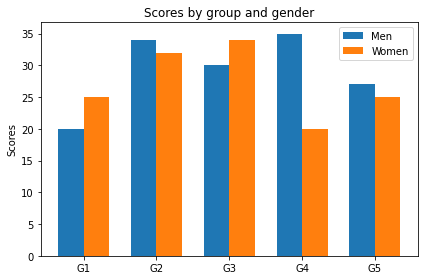

In [4]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()